# Alzheimer Disease Prediction using Machine Learning Algorithms

###### Alzheimer disease is the one amongst neurodegenerative disorders. Though the symptoms are benign initially, they become more severe over time. Alzheimer's disease is a prevalent sort of dementia. This disease is challenging one because there is no treatment for the disease. Diagnosis of the disease is done but that too at the later stage only. Thus if the disease is predicted earlier, the progression or the symptoms of the disease can be slow down. This paper uses machine learning algorithms to predict the Alzheimer disease using psychological parameters like age, number of visit, MMSE and education. 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import model_selection

In [2]:
data=pd.read_csv('oasis_longitudinal.csv')

In [3]:
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
data.shape

(373, 15)

In [5]:
data.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [6]:
data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [8]:
df= data.loc[data['Visit']==1]

In [9]:
df = df.reset_index(drop=True)

In [10]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [11]:
from sklearn.preprocessing import LabelEncoder 

In [12]:
lab=LabelEncoder()

In [13]:
df['M/F']=lab.fit_transform(df['M/F'])
df['Group']=lab.fit_transform(df['Group'])
df['Hand']=lab.fit_transform(df['Hand'])

In [14]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,2,1,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,OAS2_0002_MR1,1,1,0,1,0,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,OAS2_0004_MR1,2,1,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,OAS2_0005_MR1,2,1,0,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,OAS2_0007_MR1,1,1,0,1,0,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [15]:
df1=df.drop(df[['Subject ID','MRI ID','Visit']],axis=1)
df1.head()

,Group,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,0,1,0,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,2,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,2,0,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,1,0,1,0,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [16]:
df1.isnull().sum()

Group       0
MR Delay    0
M/F         0
Hand        0
Age         0
EDUC        0
SES         8
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

In [17]:
df2= df1.dropna()
df2.isnull().sum()
df2.head()

,Group,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,2,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,2,0,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039
5,2,0,0,0,93,14,2.0,30.0,0.0,1272,0.698,1.380
6,1,0,1,0,68,12,2.0,27.0,0.5,1457,0.806,1.205


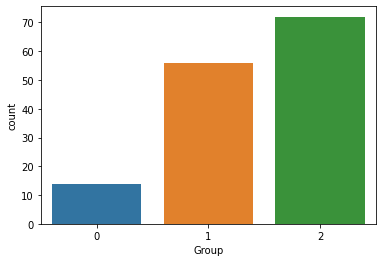

In [18]:
sns.countplot(x='Group',data=df2)

In [19]:
def bar_chart(feature):
    Demented =df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True,figsize=(8,5))
    

Text(0.5, 1.0, 'Gender and Demented rate')

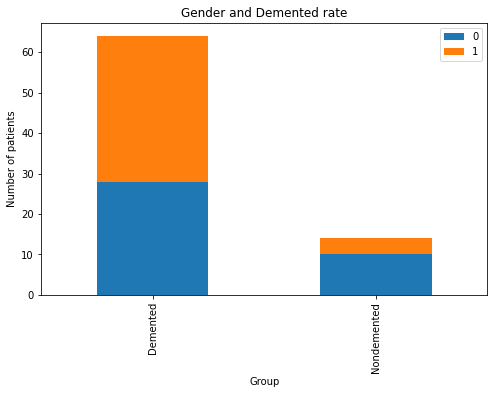

In [20]:
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

(15.0, 30.0)

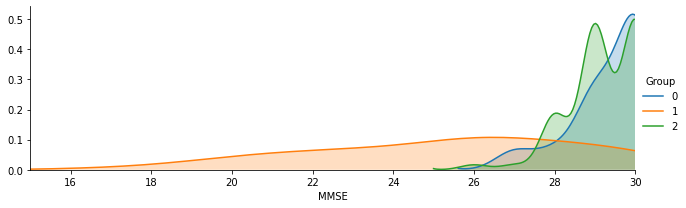

In [21]:
facet=sns.FacetGrid(df,hue='Group', aspect=3)
facet.map(sns.kdeplot,'MMSE',shade=True)
facet.set(xlim=(0,df['MMSE'].max()))
facet.add_legend()
plt.xlim(15,30)

(0.5, 2.0)

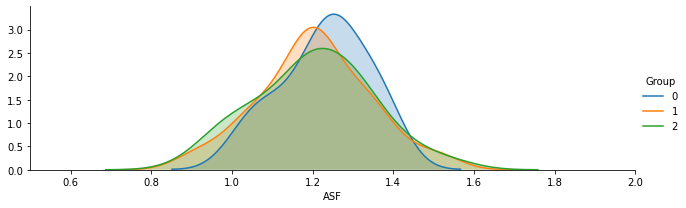

In [22]:
facet=sns.FacetGrid(df,hue='Group', aspect=3)
facet.map(sns.kdeplot,'ASF',shade=True)
facet.set(xlim=(0,df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5,2)

(0.6, 0.9)

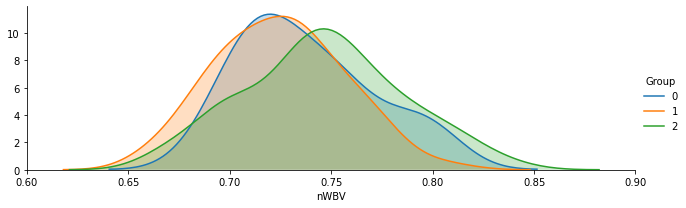

In [23]:
facet=sns.FacetGrid(df,hue='Group', aspect=3)
facet.map(sns.kdeplot,'nWBV',shade=True)
facet.set(xlim=(0,df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)

(900.0, 2100.0)

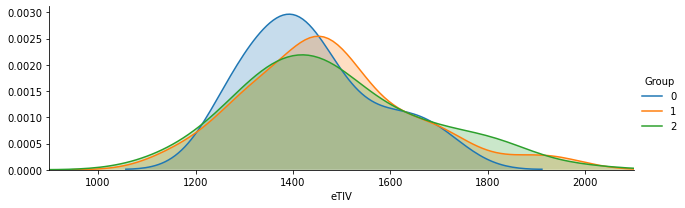

In [24]:
facet=sns.FacetGrid(df,hue='Group', aspect=3)
facet.map(sns.kdeplot,'eTIV',shade=True)
facet.set(xlim=(0,df['eTIV'].max()))
facet.add_legend()
plt.xlim(900,2100)

(0.0, 0.16)

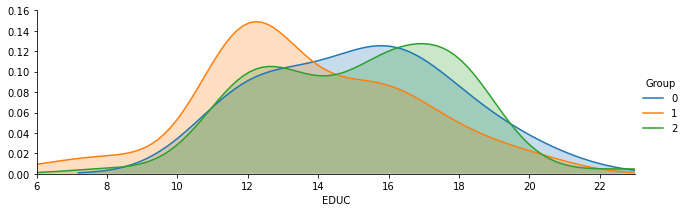

In [25]:
facet=sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade=True)
facet.set(xlim=(df['EDUC'].min(),df['EDUC'].max()))
facet.add_legend()
plt.ylim(0,0.16)

In [26]:
x=df2.iloc[:,df2.columns!='Group']
y=df2.iloc[:,df2.columns=='Group']

In [27]:
x.shape

(142, 11)

In [28]:
x.head()

,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,0,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039
5,0,0,0,93,14,2.0,30.0,0.0,1272,0.698,1.380
6,0,1,0,68,12,2.0,27.0,0.5,1457,0.806,1.205


In [29]:
y.head()

,Group
0,2
2,2
3,2
5,2
6,1


In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
xtrain.head()

,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
147,0,0,0,72,16,3.0,24.0,0.5,1354,0.733,1.296
136,0,1,0,76,16,3.0,30.0,0.0,1832,0.769,0.958
58,0,1,0,80,17,1.0,28.0,0.0,1660,0.728,1.057
63,0,1,0,69,16,2.0,28.0,0.0,1848,0.737,0.950
92,0,0,0,76,12,3.0,27.0,0.5,1315,0.698,1.335


In [31]:
ytrain.head()

,Group
147,1
136,2
58,2
63,2
92,1


### svm classifier

In [32]:
from sklearn.svm import SVC

In [33]:
model1=SVC()

In [34]:
model1.fit(xtrain,ytrain)

SVC()

In [35]:
predic1=model1.predict(xtest)

In [36]:
from sklearn.metrics import accuracy_score
acc1=accuracy_score(predic1,ytest)
acc1

0.5813953488372093

In [37]:
from sklearn.metrics import classification_report

In [38]:
def apply_classifier(model1,xtrain,xtest,ytrain,ytest):
    model1.fit(xtrain,ytrain)
    predictions=model1.predict(xtest)
    print("\n classification report : \n {}",format(classification_report(ytest,predictions)))

In [39]:
apply_classifier(model1,xtrain,xtest,ytrain,ytest)


 classification report : 
 {}               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        13
           2       0.58      1.00      0.74        25

    accuracy                           0.58        43
   macro avg       0.19      0.33      0.25        43
weighted avg       0.34      0.58      0.43        43



### SVM with Kernal Tricks

In [40]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(xtrain, ytrain)

SVC(kernel='linear')

In [41]:
apply_classifier(model_linear_kernal,xtrain,xtest,ytrain,ytest)


 classification report : 
 {}               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      1.00      1.00        13
           2       0.83      1.00      0.91        25

    accuracy                           0.88        43
   macro avg       0.61      0.67      0.64        43
weighted avg       0.79      0.88      0.83        43



In [42]:
results = model_selection.cross_val_score(model_linear_kernal, x, y)
print("MeanSqareError(MSE): %.3f (%.3f)" % (results.mean(), results.std()))

MeanSqareError(MSE): 0.894 (0.023)


### Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier(random_state= 42)
apply_classifier(decision_tree,xtrain,xtest,ytrain,ytest)


 classification report : 
 {}               precision    recall  f1-score   support

           0       0.17      0.20      0.18         5
           1       1.00      0.92      0.96        13
           2       0.84      0.84      0.84        25

    accuracy                           0.79        43
   macro avg       0.67      0.65      0.66        43
weighted avg       0.81      0.79      0.80        43



### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(random_state=42)
apply_classifier(random_forest,xtrain,xtest,ytrain,ytest)


 classification report : 
 {}               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      1.00      1.00        13
           2       0.82      0.92      0.87        25

    accuracy                           0.84        43
   macro avg       0.61      0.64      0.62        43
weighted avg       0.78      0.84      0.81        43



### Gaussian Naive_bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)
apply_classifier(model,xtrain,xtest,ytrain,ytest)


 classification report : 
 {}               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      1.00      1.00        13
           2       0.83      1.00      0.91        25

    accuracy                           0.88        43
   macro avg       0.61      0.67      0.64        43
weighted avg       0.79      0.88      0.83        43



###### Machine learning approach to predict the Alzheimer disease using machine learning algorithms is successfully implemented and gives greater prediction accuracy results. The model predicts the disease in the patient and also distinguishes between the cognitive impairment

### CONCLUSION


After training our models on the variables. it is estimated that SVM kernal trics, Naïve Bayes and Random Forest gives higher accuracy of 90 % in the cases on predicting Alziheimer disease. The results of the presented work can be used for enhancing defense against terrorist attacks in coming times.The conduct of the algorithms is compared based on their accuracy. Then the dataset is partitioned according to that ratio and when the algorithms are compared the best one is selected from SVM kernal trics, Naïve Bayes and Random Forest and can be used for next stage of prediction.

